In [364]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [365]:

#read in the url and scrape ticker data
indx = 'SP500'
source_table_name = 'Data/'+indx+'.csv'
data_table = pd.read_csv(source_table_name)
# data_table = data_table.head(4)
# data_table

In [366]:
# ############################ run this once And save the results to a csv. Taked approx. 22 mins 
# ################### Comment after it has executed once. 
# # tickers = company_list
# tickers = data_table['Symbol'].str.strip()

# closing_prices_list = []
# for ticker in tickers:
#     try:
#         prices = pdr.DataReader(ticker,'yahoo','10/24/2019')
#         # print(prices)
#         prices = prices['Close']
#         prices = pd.DataFrame(prices)
#         # print(prices)
#         prices.columns = [ticker]
#         closing_prices_list.append(prices)
#         # print(closing_prices_list)
#     except:
#         pass
#     # print(closing_prices_list)
#     prices_df = pd.concat(closing_prices_list,axis=1)

# prices_df.sort_index(inplace=True)
# prices_df
# prices_df.to_csv("Data/"+indx+"_Close_prices_df.csv", index=True)

In [367]:
# the data gathered in the above dataframe and saved to csv file is being retrieved here
fromcsv = pd.read_csv("Data/"+indx+"_Close_prices_df.csv")
fromcsv=fromcsv.set_index('Date')
fromcsv

prices_df = fromcsv
prices_df.shape

(505, 503)

In [368]:
prices_df.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [369]:
# prices_df.pct_change()

In [370]:
# prices_df.pct_change() # gets the precentage change across column leaving the first row NAN
# (prices_df.pct_change().sum()/len(prices_df)-1)*len(prices_df)
# this can be replaced by the following

In [371]:
# per_change = prices_df.diff().sum()
# per_change

In [372]:
# per_change/prices_df.iloc[0]

In [373]:
per_change = (prices_df.diff().sum())/prices_df.iloc[0]
per_change = per_change.to_frame()
per_change

,0
MMM,0.126259
ABT,0.554449
ABBV,0.415461
ABMD,0.971716
ACN,0.929405
...,...
YUM,0.153649
ZBRA,1.514829
ZBH,0.122699
ZION,0.387497


In [374]:
# per_change = prices_df.pct_change().mean()*len(prices_df)
# per_change = per_change.to_frame()
# per_change

In [375]:
# change for time intervel
# ((41.248280-27.372362)/27.372362)*100

In [376]:
# prices_df.pct_change()

In [377]:
per_change = per_change.rename(columns={0:'Returns'})
per_change

,Returns
MMM,0.126259
ABT,0.554449
ABBV,0.415461
ABMD,0.971716
ACN,0.929405
...,...
YUM,0.153649
ZBRA,1.514829
ZBH,0.122699
ZION,0.387497


In [378]:
prices_df['AAPL'].sum()/len(prices_df)

109.16297503178663

In [379]:
vol = prices_df.std()

In [380]:
# vol = (((prices_df - prices_df.mean())**2).sum())/len(prices_df)-1
# vol = vol.to_frame()
# vol.isna().sum()

In [381]:
# vol = np.sqrt(vol)
# vol

In [382]:
# prices_df.sum()/len(prices_df)


In [383]:
per_change['Volatility'] = vol
per_change

,Returns,Volatility
MMM,0.126259,18.194670
ABT,0.554449,15.160307
ABBV,0.415461,12.394728
ABMD,0.971716,65.090582
ACN,0.929405,49.649354
...,...,...
YUM,0.153649,15.086160
ZBRA,1.514829,127.645795
ZBH,0.122699,17.811862
ZION,0.387497,10.929388


In [384]:

per_change = per_change.fillna(0)
per_change[per_change['Volatility'].isna()]

,Returns,Volatility


In [385]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
# returns = prices_df.pct_change().mean() * len(prices_df)
# returns = pd.DataFrame(returns)
# returns.columns = ['Returns']
# per_change['Volatility'] = prices_df.pct_change().std() * sqrt(len(prices_df))
# per_change

# OUTLIERS OUTLIERS

In [386]:
# Summary Statistics
per_change.describe()

,Returns,Volatility
count,503.000000,503.000000
mean,0.570812,32.856828
std,1.295890,63.062182
min,-0.501510,1.160418
25%,0.097785,8.850996
50%,0.349167,16.559295
75%,0.717033,32.274927
max,19.811934,704.120420


## Qaurtiles to get upper lower bound

In [387]:
val1 = per_change["Returns"]
quartiles_var = val1.quantile([.25,.5,.75]).round(2)
lowerq = quartiles_var[.25].round(2)
upperq = quartiles_var[.75].round(2)
iqr = round((upperq-lowerq),2)

lowerb = round((lowerq - (1.5*iqr)),2)
upperb = round((upperq + (1.5*iqr)),2)

lower_bound = round((lowerq - (1.5*iqr)),2)
upper_bound = round((upperq + (1.5*iqr)),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

Values below -0.83 could be outliers.
Values above 1.65 could be outliers.


In [388]:
per_change_no = per_change.loc[per_change["Returns"]>=lower_bound]
per_change_no = per_change_no.loc[per_change_no["Returns"]<=upper_bound]
per_change_no

# per_change_o = per_change.loc[~per_change.index.isin(per_change_no.index)]
# per_change_o

,Returns,Volatility
MMM,0.126259,18.194670
ABT,0.554449,15.160307
ABBV,0.415461,12.394728
ABMD,0.971716,65.090582
ACN,0.929405,49.649354
...,...,...
YUM,0.153649,15.086160
ZBRA,1.514829,127.645795
ZBH,0.122699,17.811862
ZION,0.387497,10.929388


In [389]:
val1 = per_change["Volatility"]
quartiles_var = val1.quantile([.25,.5,.75]).round(2)
lowerq = quartiles_var[.25].round(2)
upperq = quartiles_var[.75].round(2)
iqr = round((upperq-lowerq),2)

lowerb = round((lowerq - (1.5*iqr)),2)
upperb = round((upperq + (1.5*iqr)),2)

lower_bound = round((lowerq - (1.5*iqr)),2)
upper_bound = round((upperq + (1.5*iqr)),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

Values below -26.28 could be outliers.
Values above 67.4 could be outliers.


In [390]:
per_change_no = per_change_no.loc[per_change_no["Volatility"]>=lower_bound]
per_change_no = per_change_no.loc[per_change_no["Volatility"]<=upper_bound]
per_change_no


,Returns,Volatility
MMM,0.126259,18.194670
ABT,0.554449,15.160307
ABBV,0.415461,12.394728
ABMD,0.971716,65.090582
ACN,0.929405,49.649354
...,...,...
XYL,0.578800,21.187089
YUM,0.153649,15.086160
ZBH,0.122699,17.811862
ZION,0.387497,10.929388


In [391]:
stock_data_scaled = StandardScaler().fit_transform(per_change_no)
stock_data_scaled_df = pd.DataFrame(stock_data_scaled)
stock_data_scaled_df.shape
# stock_data_scaled

(446, 2)

In [392]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_data_scaled)
    distortions.append(sum(np.min(cdist(stock_data_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / stock_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


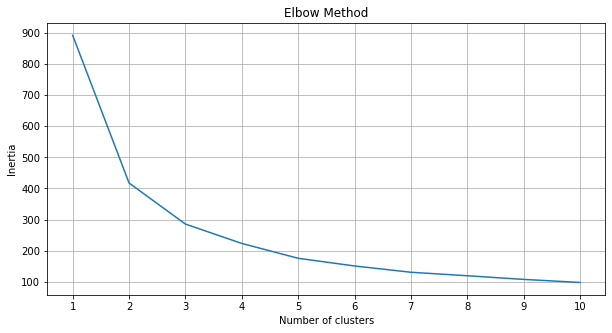

In [393]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')

plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

In [394]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(stock_data_scaled)

# Predict clusters
predictions = model.predict(stock_data_scaled)

In [395]:
# Add the predicted cluster column to the dataframe (name it class)
per_change_no["Cluster"] = model.labels_
per_change_no["Cluster"].unique()
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

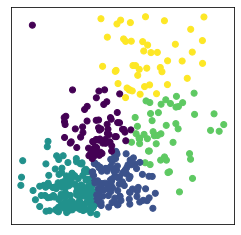

In [396]:
plt.figure(figsize=(4, 4))
plt.scatter(x=per_change_no['Returns'], y=per_change_no['Volatility'], c=per_change_no['Cluster'])

# plt.title('Clusters')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.savefig("static/Images/"+indx+"_clusters.png")
plt.show()

In [397]:
per_change_no

,Returns,Volatility,Cluster
MMM,0.126259,18.194670,2
ABT,0.554449,15.160307,1
ABBV,0.415461,12.394728,1
ABMD,0.971716,65.090582,4
ACN,0.929405,49.649354,4
...,...,...,...
XYL,0.578800,21.187089,1
YUM,0.153649,15.086160,2
ZBH,0.122699,17.811862,2
ZION,0.387497,10.929388,1


In [398]:
file_path = "Data/Analyzed/"+indx+"_Clustered_Stocks_No_Outliers.csv"
per_change_no.to_csv(file_path)

In [399]:
# OUTLIERS

In [400]:

per_change_o = per_change.loc[~per_change.index.isin(per_change_no.index)]
per_change_o

,Returns,Volatility
ADBE,1.397293,102.321893
AMD,2.878783,21.917919
ALB,2.453348,55.018736
ALGN,1.367359,172.833280
GOOGL,1.184074,522.241222
GOOG,1.198511,535.833264
AMZN,0.871447,607.894812
AZO,0.626809,212.289068
BBWI,3.991725,19.445796
BIO,1.249332,129.339109


In [401]:
stock_data_scaled = StandardScaler().fit_transform(per_change_o)
stock_data_scaled_df = pd.DataFrame(stock_data_scaled)
stock_data_scaled_df.shape
# stock_data_scaled

(57, 2)

In [402]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_data_scaled)
    distortions.append(sum(np.min(cdist(stock_data_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / stock_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


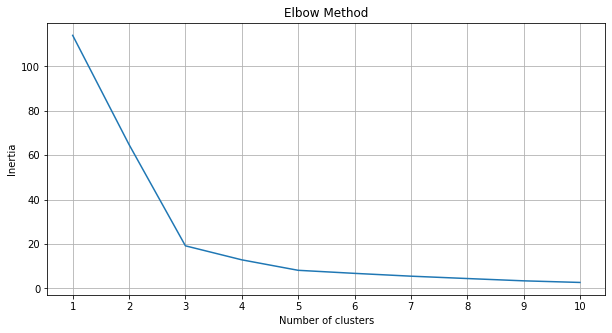

In [403]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')

plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

In [404]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(stock_data_scaled)

# Predict clusters
predictions = model.predict(stock_data_scaled)

In [405]:
# Add the predicted cluster column to the dataframe (name it class)
per_change_o["Cluster"] = model.labels_
per_change_o["Cluster"].unique()
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


<ipython-input-405-b56720131351>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_change_o["Cluster"] = model.labels_


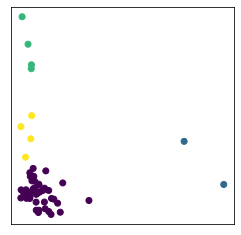

In [406]:
plt.figure(figsize=(4, 4))
plt.scatter(x=per_change_o['Returns'], y=per_change_o['Volatility'], c=per_change_o['Cluster'])

# plt.title('Clusters')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.savefig("static/Images/"+indx+"_clusters.png")
plt.show()

In [408]:
per_change_o = per_change_o.sort_values(by='Cluster')
per_change_o = per_change_o.reset_index()
per_change_o = per_change_o.rename(columns={'index':'Stock'})
per_change_o

,Stock,Returns,Volatility,Cluster
0,ADBE,1.397293,102.321893,0
1,WST,2.008462,90.336108,0
2,INTU,1.326110,97.958159,0
3,KLAC,1.048477,70.637489,0
4,LRCX,1.088987,144.695876,0
5,MKTX,0.175786,69.379962,0
6,MPWR,2.471313,103.633428,0
7,MSCI,1.933148,114.760857,0
8,NFLX,1.477495,87.563044,0
9,NVDA,3.734329,51.165780,0


In [409]:
file_path = "Data/Analyzed/"+indx+"_Clustered_Stocks_Outliers.csv"
per_change_o.to_csv(file_path)

# PCA ??
As there were only 2 features , we do not require any dimenssionality reduction

#### uncomment the following cells if you want to check with PCA (Principal component analysis)

In [410]:
# # Initialize PCA model
# pca = PCA(n_components=0.90)
# stock_data_scaled_df
# stock_data_scaled_df
# # stock_data_scaled
# stock_data_scaled.shape
# stock_data_for_pca = pca.fit_transform(stock_data_scaled)
# stock_data_for_pca.shape
# # stock_data_for_pca
# plt.figure(figsize=(10, 5))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], alpha=0.4)
# plt.title('Cryptocurrency clusters')
# plt.show()

In [411]:
# distortions = []
# inertia = []
# k = range(1, 11)
# # Calculate the inertia for the range of k values
# for i in k:
#     km = KMeans(n_clusters=i, random_state=0)
#     km.fit(stock_data_for_pca)
#     distortions.append(sum(np.min(cdist(stock_data_for_pca, km.cluster_centers_,
#                                         'euclidean'), axis=1)) / stock_data_for_pca.shape[0])
#     inertia.append(km.inertia_)
# # # Add the predicted cluster column to the dataframe (name it class)
# # per_change["Cluster"] = model.labels_
# # per_change["Cluster"].unique()
# # centroids = model.cluster_centers_
# # centroids_x = centroids[:,0]
# # centroids_y = centroids[:,1]
# # Predicting clusters with k=4


In [412]:

# # Initialize the k-means model
# model = KMeans(n_clusters=4, random_state=0)

# # Fit the model
# model.fit(stock_data_for_pca)

# # Predict clusters
# predictions = model.predict(stock_data_for_pca)
# plt.figure(figsize=(8, 4))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], c=model.labels_)
# plt.title('Stock Clusters')
# plt.show()